# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 237-200x300.jpg to 237-200x300 (1).jpg


Loaded Picsum image with shape: (450, 300, 3)
gray_numpy shape: (450, 300)
gray_cv2 shape: (450, 300)


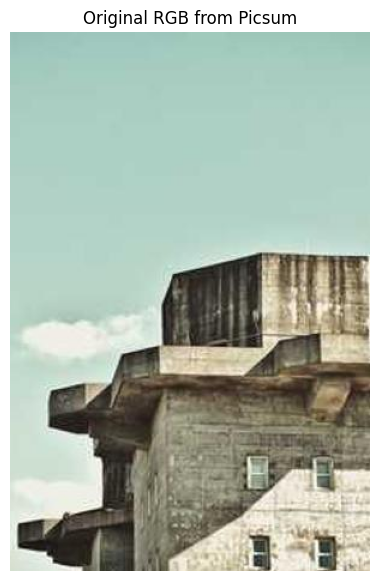

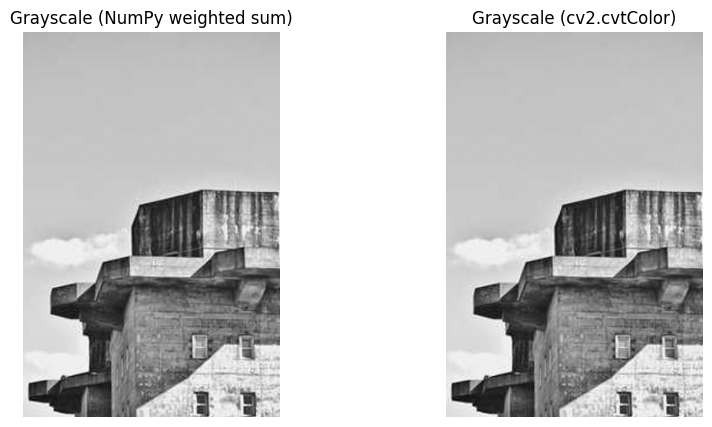

In [25]:
# Part A: load and show image using a Picsum image
# Grayscale using numpy + cv2

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from io import BytesIO

# ---- Download Picsum Image ----
# You can change width/height (e.g. 300/450)
url = "https://picsum.photos/300/450"

response = requests.get(url)
pil_img = Image.open(BytesIO(response.content)).convert("RGB")
rgb = np.array(pil_img)

print("Loaded Picsum image with shape:", rgb.shape)

# ---- Display RGB ----
plt.figure(figsize=(5, 7))
plt.imshow(rgb)
plt.title("Original RGB from Picsum")
plt.axis("off")

# ---- GRAYSCALE (NUMPY) ----
weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
gray_numpy = (rgb.astype(np.float32) * weights).sum(axis=2)

# ---- GRAYSCALE (CV2) ----
bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
gray_cv2 = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY).astype(np.float32)

# ---- SHOW BOTH ----
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_numpy, cmap='gray')
plt.title("Grayscale (NumPy weighted sum)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_cv2, cmap='gray')
plt.title("Grayscale (cv2.cvtColor)")
plt.axis("off")

# ---- Print sample values ----
print("gray_numpy shape:", gray_numpy.shape)
print("gray_cv2 shape:", gray_cv2.shape)


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

FFT shape: (450, 300)
Magnitude: min/max: 0.9095492 22693032.0
Phase: min/max: -3.1415899 3.1415899


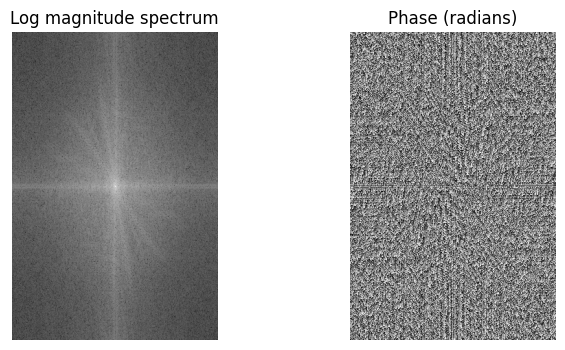

In [26]:
# Part B: FFT of grayscale image
import numpy.fft as fft

# ensure float grayscale image
f = gray_numpy.copy()
H, W = f.shape

# 1) 2D FFT
F = fft.fft2(f)
# 2) shift zero frequency to center
F_shift = fft.fftshift(F)

# compute magnitude and phase
magnitude = np.abs(F_shift)
phase = np.angle(F_shift)

# display magnitude spectrum (log-scale for visibility)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(np.log1p(magnitude), cmap="gray")  # log(1 + mag)
plt.title("Log magnitude spectrum")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(phase, cmap="gray")
plt.title("Phase (radians)")
plt.axis("off")

# print some stats
print("FFT shape:", F_shift.shape)
print("Magnitude: min/max:", magnitude.min(), magnitude.max())
print("Phase: min/max:", phase.min(), phase.max())


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(299.5), np.float64(449.5), np.float64(-0.5))

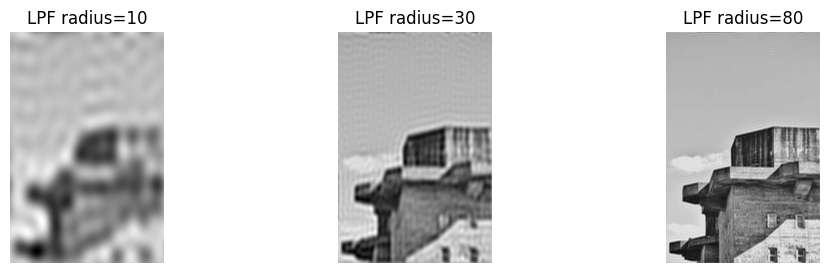

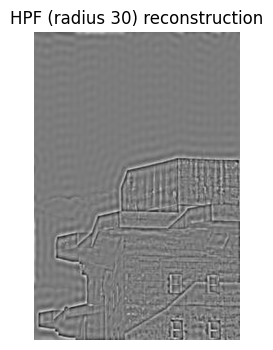

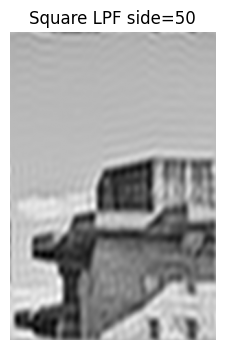

In [27]:
# Part C: create masks and apply filters
def create_circular_mask(H, W, radius):
    yy, xx = np.ogrid[:H, :W]
    center_y, center_x = H//2, W//2
    dist2 = (yy - center_y)**2 + (xx - center_x)**2
    mask = (dist2 <= radius**2).astype(np.float32)
    return mask

def reconstruct_from_mask(F_shift, mask):
    # apply mask in shifted domain, then inverse shift and inverse FFT
    G_shift = F_shift * mask
    G = fft.ifftshift(G_shift)
    img_back = fft.ifft2(G)
    # keep real component and clip
    img_back_real = np.real(img_back)
    return img_back_real

radii = [10, 30, 80]
recons = {}
plt.figure(figsize=(12,3))
for i, r in enumerate(radii):
    m = create_circular_mask(H, W, r)
    recon = reconstruct_from_mask(F_shift, m)
    recons[r] = recon
    plt.subplot(1, len(radii), i+1)
    plt.imshow(recon, cmap="gray")
    plt.title(f"LPF radius={r}")
    plt.axis("off")

# Show that blur increases as radius decreases (smaller radius => fewer high freqs)
# C2: HPF (high-pass) mask: complement of a circular LPF (exclude low freq)
hp_mask = 1.0 - create_circular_mask(H, W, 30)
recon_hpf = reconstruct_from_mask(F_shift, hp_mask)
plt.figure(figsize=(5,4))
plt.imshow(recon_hpf, cmap="gray")
plt.title("HPF (radius 30) reconstruction")
plt.axis("off")

# C3: square LPF at center, side=50
side = 50
sq_mask = np.zeros((H,W), dtype=np.float32)
cy, cx = H//2, W//2
half = side//2
sq_mask[cy-half:cy-half+side, cx-half:cx-half+side] = 1.0
recon_sq = reconstruct_from_mask(F_shift, sq_mask)
plt.figure(figsize=(5,4))
plt.imshow(recon_sq, cmap="gray")
plt.title(f"Square LPF side={side}")
plt.axis("off")


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

Observations:
- Phase-only reconstruction preserves structure/edges; recognizable image.
- Magnitude-only with zero phase largely loses structure; you see textures / blobs but not object outlines.


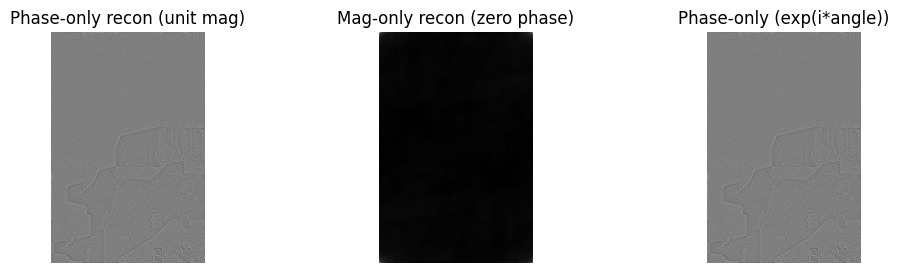

In [28]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
# Part D: phase-only reconstruction
eps = 1e-12
phase_only = F_shift / (np.abs(F_shift) + eps)   # unit magnitude, keeps phase
# reconstruct
recon_phase_only = reconstruct_from_mask(phase_only, np.ones_like(phase_only))
recon_phase_only_alt = reconstruct_from_mask(np.exp(1j * np.angle(F_shift)), np.ones((H,W)))

# Magnitude-only reconstruction
mag_only = np.abs(F_shift)
# Using zero-phase (i.e. all angles 0)
mag_with_zero_phase = mag_only * np.exp(1j * 0.0)
recon_mag_zero_phase = reconstruct_from_mask(mag_with_zero_phase, np.ones((H,W)))

# Display results
plt.figure(figsize=(12,3))
plt.subplot(1,3,1); plt.imshow(recon_phase_only, cmap="gray"); plt.title("Phase-only recon (unit mag)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(recon_mag_zero_phase, cmap="gray"); plt.title("Mag-only recon (zero phase)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(np.real(recon_phase_only_alt), cmap="gray"); plt.title("Phase-only (exp(i*angle))"); plt.axis("off")

# Observations printed
print("Observations:")
print("- Phase-only reconstruction preserves structure/edges; recognizable image.")
print("- Magnitude-only with zero phase largely loses structure; you see textures / blobs but not object outlines.")


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

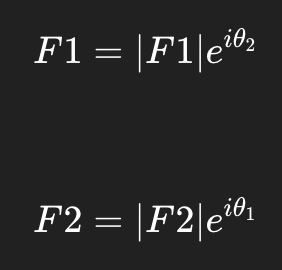

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


Bonus observation: phase tends to carry the structural/layout cues (object shapes). Magnitude carries texture/contrast information.


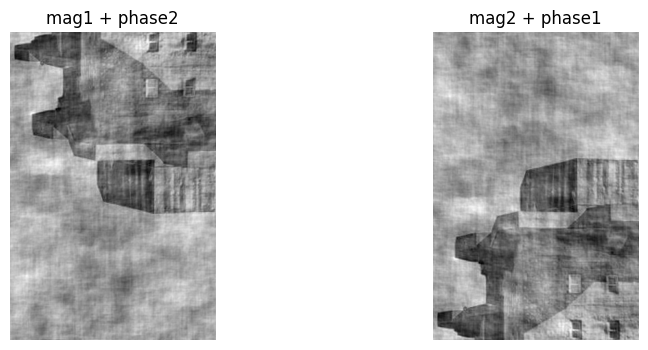

In [29]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.
# Bonus: swap magnitude & phase between two images.
path2 = "your_second_image.jpg"  # replace if you have one
if not os.path.exists(path2):
    # use a transformed version of first image as second
    rgb2 = np.flipud(rgb).copy()
else:
    rgb2 = np.array(Image.open(path2).convert("RGB"))

# convert both to grayscale floats
f1 = (np.array(Image.fromarray(rgb).convert("L"))).astype(np.float32)
f2 = (np.array(Image.fromarray(rgb2).convert("L"))).astype(np.float32)

# FFT shift versions
F1 = fft.fftshift(fft.fft2(f1))
F2 = fft.fftshift(fft.fft2(f2))

mag1, ph1 = np.abs(F1), np.angle(F1)
mag2, ph2 = np.abs(F2), np.angle(F2)

# Combine mag1 with ph2, and mag2 with ph1
F1_new = mag1 * np.exp(1j * ph2)
F2_new = mag2 * np.exp(1j * ph1)

# reconstruct
recon1_swapped = reconstruct_from_mask(F1_new, np.ones((H,W)))
recon2_swapped = reconstruct_from_mask(F2_new, np.ones((H,W)))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(recon1_swapped, cmap="gray"); plt.title("mag1 + phase2"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(recon2_swapped, cmap="gray"); plt.title("mag2 + phase1"); plt.axis("off")

print("Bonus observation: phase tends to carry the structural/layout cues (object shapes). Magnitude carries texture/contrast information.")
